In [2]:
import torch
import matplotlib.pyplot as plt
import math

In [3]:
n_x = 100
dx = 0.01

n_y = 200
dy = 0.01

n_z = 300
dz = 0.01

dt = 0.00000000001
eps0 = 8.854E-12
mu0 = 1.256E-6
c = 1 / math.sqrt(eps0 * mu0)
print("Sx", c * dt / dx)
print("Sy", c * dt / dy)
print("Sz", c * dt / dz)

Ex = torch.zeros((n_x, n_y + 1, n_z + 1))
Ey = torch.zeros((n_x + 1, n_y, n_z + 1))
Ez = torch.zeros((n_x + 1, n_y + 1, n_z))

Hx = torch.zeros((n_x + 1, n_y, n_z))
Hy = torch.zeros((n_x, n_y + 1, n_z))
Hz = torch.zeros((n_x, n_y, n_z + 1))

Hx_zero_y = torch.zeros((n_x + 1, 1, n_z))
Hx_zero_z = torch.zeros((n_x + 1, n_y, 1))
Hy_zero_x = torch.zeros((1, n_y + 1, n_z))
Hy_zero_z = torch.zeros((n_x, n_y + 1, 1))
Hz_zero_x = torch.zeros((1, n_y, n_z + 1))
Hz_zero_y = torch.zeros((n_x, 1, n_z + 1))

Sx 0.2998716584048279
Sy 0.2998716584048279
Sz 0.2998716584048279


In [4]:
Ex[40:60,90:110,140:150] = 1

In [5]:
n_steps = 1000
slices = torch.zeros((n_steps, n_y + 1, n_z + 1))
for i in range(n_steps):
    Hx += dt / mu0 * (torch.diff(Ey, dim = 2) / dz - torch.diff(Ez, dim = 1) / dy)
    Hy += dt / mu0 * (torch.diff(Ez, dim = 0) / dx - torch.diff(Ex, dim = 2) / dz)
    Hz += dt / mu0 * (torch.diff(Ex, dim = 1) / dy - torch.diff(Ey, dim = 0) / dx)
    
    Ex += dt / eps0 * (torch.diff(Hz, dim = 1, prepend=Hz_zero_y, append=Hz_zero_y) / dy - torch.diff(Hy, dim = 2, prepend=Hy_zero_z, append=Hy_zero_z) / dz)
    Ey += dt / eps0 * (torch.diff(Hx, dim = 2, prepend=Hx_zero_z, append=Hx_zero_z) / dz - torch.diff(Hz, dim = 0, prepend=Hz_zero_x, append=Hz_zero_x) / dx)
    Ez += dt / eps0 * (torch.diff(Hy, dim = 0, prepend=Hy_zero_x, append=Hy_zero_x) / dx - torch.diff(Hx, dim = 1, prepend=Hx_zero_y, append=Hx_zero_y) / dy)
    slices[i] = Ex[50]

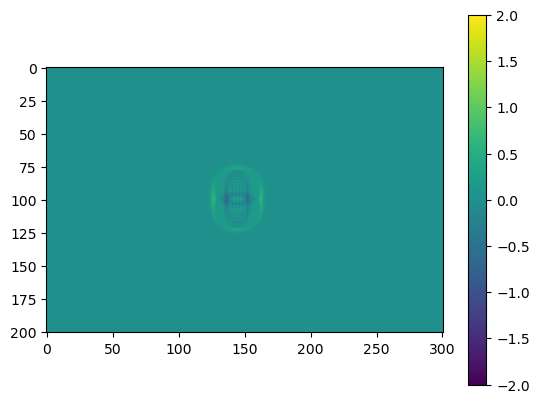

In [10]:
plt.imshow(slices[50], vmin = -2, vmax = 2)
plt.colorbar()
plt.show()